In [5]:
import numpy as np
import pandas as pd
import os, re
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

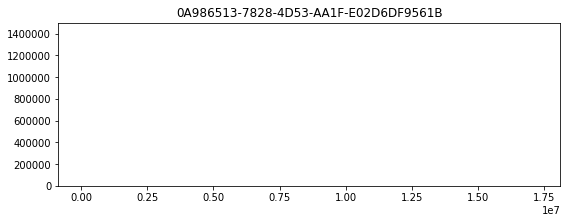

(30.0, 1429633)


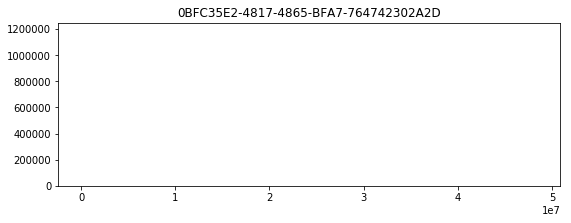

(20.0, 1188060)


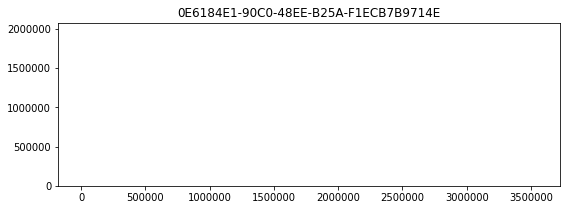

(20.0, 1977715)


In [18]:
acc_dir = 'test'

for dir_name in os.listdir(acc_dir):
    df = []
    if dir_name == '.DS_Store':
        continue
    for file in os.listdir(os.path.join(acc_dir, dir_name)):
        if file == '.DS_Store':
            continue
        data = pd.DataFrame(pd.read_csv(os.path.join(acc_dir, dir_name, file), delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z']))
        data['milliseconds'] = data['milliseconds'].apply(lambda x: (x - data['milliseconds'][0])*1000)
        base = os.path.basename(file)
        tstamp = np.int(base[:base.index('.')]) #finds index of first '.' and extracts everything before it (timestamp)
        data.insert(0, 'timestamp', tstamp)
        data['milliseconds'] = data['milliseconds'].apply(lambda x: x + int(tstamp) * 1000)
        df.append(data)
    acc_data = pd.concat(df)
    acc_data = acc_data.sort_values(by=['milliseconds'])
    dist = Counter(np.round(acc_data['milliseconds'].diff()))
    plt.figure(figsize=(9,3))
    plt.bar(dist.keys(), dist.values())
    plt.title(dir_name)
    plt.show()
    print(dist.most_common(1)[0])        